In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow_datasets as tfds
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [10]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)

train_dataset, test_dataset = tfds.load(name="cifar10", split=['train', 'test'], as_supervised=True)

# Build your input pipelines
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.map(_normalize_img)

test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(_normalize_img)

train_dataset

<MapDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [11]:
model = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    #Dropout(0.3),
    Flatten()
    #Dense(64, activation=None)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)         

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss()
)


history = model.fit(
    train_dataset,
    epochs=20

)




Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3355
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2419
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1875
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1649
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1577
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1330
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1254
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1120
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1050
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1139
Epoch 11/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1016
Epoch 12/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0985
E

In [5]:
model.save("ex9_cifar10_triplet_loss.h5")

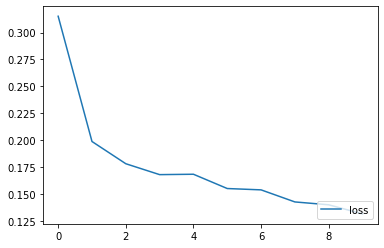

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='lower right')